In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("DMV12_Retail_Sales_Data.csv")

data.head()

,Transaction_ID,Customer_ID,State,Age,Shop_Category,Sales,Gender,Items_in_basket
0,1,1234,MP,10,Grocery,10,M,2
1,2,1235,UP,21,Dairy,30,F,3
2,3,1236,AP,23,Deli,23,F,4
3,4,1237,RP,25,Meat,21,F,4
4,5,1238,DP,27,Clothes,90,F,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction_ID   312 non-null    int64 
 1   Customer_ID      312 non-null    int64 
 2   State            312 non-null    object
 3   Age              312 non-null    int64 
 4   Shop_Category    312 non-null    object
 5   Sales            312 non-null    int64 
 6   Gender           312 non-null    object
 7   Items_in_basket  312 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 19.6+ KB


In [ ]:
data.describe()

,Transaction_ID,Customer_ID,Age,Sales,Items_in_basket
count,312.000000,312.000000,312.000000,312.000000,312.000000
mean,156.500000,7402.195513,47.730769,212.967949,4.336538
std,90.210864,3696.357257,21.572683,140.071728,2.343263
min,1.000000,1234.000000,10.000000,10.000000,2.000000
25%,78.750000,2344.000000,30.000000,92.000000,3.000000
50%,156.500000,9886.000000,43.500000,189.500000,4.000000
75%,234.250000,9934.000000,63.250000,301.250000,5.000000
max,312.000000,9990.000000,104.000000,709.000000,23.000000


In [ ]:
state_counts = pd.value_counts(data['State'])
state_counts

DP    97
AP    56
KP    52
RP    51
MP    28
UP    28
Name: State, dtype: int64

In [ ]:
state_sales = data.groupby("State")["Sales"].mean()
state_sales

State
AP    217.428571
DP    240.680412
KP    209.365385
MP    175.571429
RP    216.647059
UP    145.428571
Name: Sales, dtype: float64

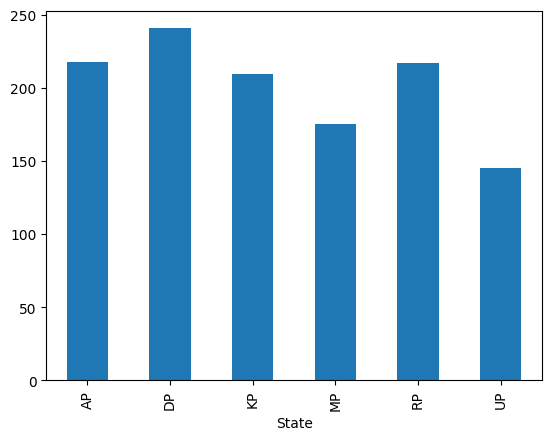

In [ ]:
import matplotlib.pyplot as plt

state_sales.plot(kind='bar')
plt.show()

In [ ]:
top_region = state_sales.idxmax()
top_sales = state_sales.max()

print(f"The top-performing region is {top_region} with a total sales amount of {top_sales}.")


The top-performing region is DP with a total sales amount of 240.68041237113403.


In [ ]:
state_category = data.groupby(["State","Shop_Category"])["Sales"].sum()

state_category

State  Shop_Category
AP     Clothes          2127
       Dairy            1197
       Deli             1303
       Electronics      3818
       Grocery           823
       Meat             2908
DP     Clothes          7133
       Dairy            6027
       Deli             1723
       Electronics      4645
       Grocery          1736
       Meat             2082
KP     Clothes          3581
       Dairy             630
       Deli             2595
       Electronics      2742
       Grocery            54
       Meat             1285
MP     Clothes           711
       Deli             1144
       Electronics       696
       Grocery           950
       Meat             1415
RP     Clothes          2167
       Dairy              74
       Deli             1006
       Electronics      3087
       Grocery          2452
       Meat             2263
UP     Clothes          1077
       Dairy             816
       Deli               87
       Electronics       500
       Grocery        

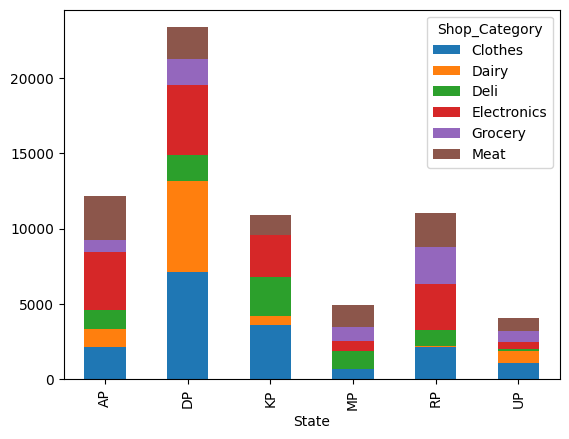

In [ ]:
state_category.unstack().plot(kind='bar', stacked= True)
plt.show()